<a href="https://colab.research.google.com/github/xyt556/Geo_Programme/blob/main/07_visualizing_rasters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 概述

在前面的笔记本中，我们学习了如何使用 [Xarray](http://xarray.pydata.org/) 处理网格数据集。XArray 也非常适合处理地理参考栅格数据——例如卫星影像、人口网格或高程数据。[rioxarray](https://corteva.github.io/rioxarray/stable/index.html) 是 xarray 的一个扩展，使得处理地理空间栅格数据变得更加容易。你可以从 `conda-forge` 频道安装 `rioxarray` 包。

在本节中，我们将获取珠穆朗玛峰地区的 4 个单独的 SRTM 瓦片，并使用 RasterIO 将它们合并为一个 GeoTiff。我们还将使用 `matplotlib` 来可视化结果并添加一些注释。

### 设置和数据下载

以下代码块将安装所需的软件包并将数据集下载到你的Colab环境中。

(1) colab.google. https://colab.google/.
(2) Google Colab. https://colab.research.google.com/.
(3) How to Download Multiple Files or an Entire Folder from Google Colab. https://saturncloud.io/blog/how-to-download-multiple-files-or-an-entire-folder-from-google-colab/.
(4) Google Colab for Deep Learning: A Step-by-Step Guide. https://www.dataquest.io/blog/getting-started-with-google-colab-for-deep-learning/.
(5) Google Colab Tutorial for Data Scientists - DataCamp. https://www.datacamp.com/tutorial/tutorial-google-colab-for-data-scientists.
(6) Google Colab - Downloading Data and Files to your Local Computer .... https://www.youtube.com/watch?v=xK8w0LWQ5q0.
(7) How to Import Kaggle Datasets Directly into Google Colab. https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/.
(8) Download Datasets from Kaggle on Google Colab - bam098. https://bam098.github.io/blog/kaggle/google%20colab/2020/03/15/kaggle-download-colab.html.
(9) undefined. https://github.com/ad17171717/YouTube.
(10) undefined. https://github.com/ad17171717.
(11) undefined. https://odysee.com/@adriandolinay:0.

In [1]:
%%capture
if 'google.colab' in str(get_ipython()):
    !pip install --quiet rioxarray

按照惯例，`rioxarray` 通常被导入为 `rxr`。

> 请记住，即使你只使用子模块（如 `merge_arrays`），也要始终导入 `rioxarray`。导入 `rioxarray` 会激活 `rio` 访问器，这是所有操作所必需的。

In [2]:
import os
import rioxarray as rxr
from rioxarray.merge import merge_arrays
import matplotlib.pyplot as plt

In [3]:
data_folder = 'data'
output_folder = 'output'

if not os.path.exists(data_folder):
    os.mkdir(data_folder)
if not os.path.exists(output_folder):
    os.mkdir(output_folder)

In [4]:
import os

# 定义下载函数
def download(url):
    # 生成文件路径，使用os.path.join将目标文件夹和文件名拼接成完整路径
    filename = os.path.join(data_folder, os.path.basename(url))

    # 如果文件不存在，则开始下载
    if not os.path.exists(filename):
        from urllib.request import urlretrieve  # 从urllib模块中导入urlretrieve函数
        local, _ = urlretrieve(url, filename)  # 下载文件并保存到指定路径
        print('Downloaded ' + local)  # 打印下载完成的文件路径

# SRTM地形数据的文件列表
srtm_tiles = [
  'N27E086.hgt',
  'N27E087.hgt',
  'N28E086.hgt',
  'N28E087.hgt'
]

# 数据源URL
data_url = 'https://github.com/xyt556/python-dataviz-web/raw/main/data/srtm/'

# 遍历SRTM地形数据文件列表，下载每个文件
for tile in srtm_tiles:
  url = '{}/{}'.format(data_url, tile)  # 拼接每个文件的完整URL
  download(url)  # 调用下载函数下载文件


Downloaded data/N27E086.hgt
Downloaded data/N27E087.hgt
Downloaded data/N28E086.hgt
Downloaded data/N28E087.hgt


## Rioxarray 基础

`rioxarray` 的 `open_rasterio()` 方法能够读取任何由 [`rasterio`](https://rasterio.readthedocs.io/en/latest/) 库支持的数据源。让我们使用 `rioxarray` 打开一个单独的 SRTM 瓦片。


(1) xarray.open_rasterio. https://docs.xarray.dev/en/v2022.10.0/generated/xarray.open_rasterio.html.
(2) Python常用遥感模块Rasterio与Rioxarray的安装与使用 .... https://blog.csdn.net/m0_51755720/article/details/130923419.
(3) corteva/rioxarray: geospatial xarray extension powered by rasterio - GitHub. https://github.com/corteva/rioxarray.
(4) undefined. https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html.
(5) undefined. https://github.com/rasterio/rasterio/raw/1.2.1/tests/data/RGB.byte.tif.
(6) undefined. https://github.com/dymaxionlabs/dask-rasterio.

In [6]:
filename = 'N28E087.hgt'
file_path = os.path.join(data_folder, filename)
rds = rxr.open_rasterio(file_path)
rds

<xarray.DataArray (band: 1, y: 3601, x: 3601)> Size: 26MB
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

结果是一个 `xarray.DataArray` 对象。

In [7]:
rds

<xarray.DataArray (band: 1, y: 3601, x: 3601)> Size: 26MB
[12967201 values with dtype=int16]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

你可以使用 `values` 属性来访问像素值，该属性将数组的数据作为 numpy 数组返回。

In [8]:
rds.values

array([[[5217, 5211, 5208, ..., 5097, 5098, 5089],
        [5206, 5201, 5200, ..., 5080, 5075, 5069],
        [5199, 5194, 5191, ..., 5063, 5055, 5048],
        ...,
        [5347, 5345, 5343, ..., 5747, 5750, 5757],
        [5338, 5338, 5336, ..., 5737, 5740, 5747],
        [5332, 5331, 5332, ..., 5734, 5736, 5744]]], dtype=int16)

`xarray.DataArray` 对象还包含一个或多个 `coordinates`。每个坐标是一个一维数组，表示沿数据轴之一的值。在单波段的 SRTM 高程数据中，我们有 3 个坐标——`x`、`y` 和 `band`。

In [9]:
rds.coords

Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0

栅格元数据存储在 [`rio`](https://corteva.github.io/rioxarray/stable/rioxarray.html#rioxarray-rio-accessors) 访问器中。这是由 `rioxarray` 库启用的，该库在 `xarray` 之上提供地理空间功能。

In [10]:
print('CRS:', rds.rio.crs)
print('Resolution:', rds.rio.resolution())
print('Bounds:', rds.rio.bounds())
print('Width:', rds.rio.width)
print('Height:', rds.rio.height)

CRS: EPSG:4326
Resolution: (0.0002777777777777778, -0.0002777777777777778)
Bounds: (86.99986111111112, 27.999861111111112, 88.00013888888888, 29.000138888888888)
Width: 3601
Height: 3601


In [13]:
band1 = rds.sel(band=1)
band1

<xarray.DataArray (y: 3601, x: 3601)> Size: 26MB
array([[5217, 5211, 5208, ..., 5097, 5098, 5089],
       [5206, 5201, 5200, ..., 5080, 5075, 5069],
       [5199, 5194, 5191, ..., 5063, 5055, 5048],
       ...,
       [5347, 5345, 5343, ..., 5747, 5750, 5757],
       [5338, 5338, 5336, ..., 5737, 5740, 5747],
       [5332, 5331, 5332, ..., 5734, 5736, 5744]], dtype=int16)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 29kB 87.0 87.0 87.0 87.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 29kB 29.0 29.0 29.0 29.0 ... 28.0 28.0 28.0 28.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

## 绘制多个栅格图像

你可以使用 `rioxarray` 的 `open_rasterio()` 方法打开每个源文件，并将结果数据集存储在一个列表中。以下是一个示例代码：

```python
import rioxarray as rxr

# 定义SRTM瓦片文件路径
srtm_files = [
    'path_to_tile1.tif',
    'path_to_tile2.tif',
    'path_to_tile3.tif',
    'path_to_tile4.tif'
]

# 打开每个源文件并存储在列表中
datasets = [rxr.open_rasterio(file) for file in srtm_files]

# 打印每个数据集的信息
for ds in datasets:
    print(ds)
```

请将 `path_to_tile1.tif` 等替换为实际的文件路径。这段代码将打开每个SRTM瓦片文件，并将它们存储在 `datasets` 列表中。你可以进一步处理这些数据集，例如合并它们或进行可视化。

(1) xarray.open_rasterio. https://docs.xarray.dev/en/v2022.10.0/generated/xarray.open_rasterio.html.
(2) Python常用遥感模块Rasterio与Rioxarray的安装与使用 .... https://blog.csdn.net/m0_51755720/article/details/130923419.
(3) corteva/rioxarray: geospatial xarray extension powered by rasterio - GitHub. https://github.com/corteva/rioxarray.
(4) undefined. https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html.
(5) undefined. https://github.com/rasterio/rasterio/raw/1.2.1/tests/data/RGB.byte.tif.
(6) undefined. https://github.com/dymaxionlabs/dask-rasterio.

In [14]:
# 初始化一个空列表，用于存储每个SRTM地形数据
datasets = []

# 遍历每个SRTM地形数据文件
for tile in srtm_tiles:
    # 生成每个文件的完整路径
    path = os.path.join(data_folder, tile)

    # 使用rioxarray的open_rasterio函数打开栅格数据文件
    rds = rxr.open_rasterio(path)

    # 选择第一个波段的数据（通常是地形高度数据）
    band = rds.sel(band=1)

    # 将波段数据添加到datasets列表中
    datasets.append(band)


你可以通过调用 `plot()` 方法来可视化任何 `DataArray` 对象。这里我们创建一个包含1行4列的子图。`subplots()` 方法将返回一个Axes列表，我们可以用它来渲染每个源SRTM栅格。对于多列的图，Axes将是一个嵌套列表。为了方便迭代，我们可以使用 `.flat`，它返回一个1D迭代器。

在绘制数据时，我们可以使用 `cmap` 选项来指定颜色渐变。这里我们使用内置的 *Greys* 渐变。附加 **_r** 可以得到反转的渐变，其中黑色表示较低的高程值。

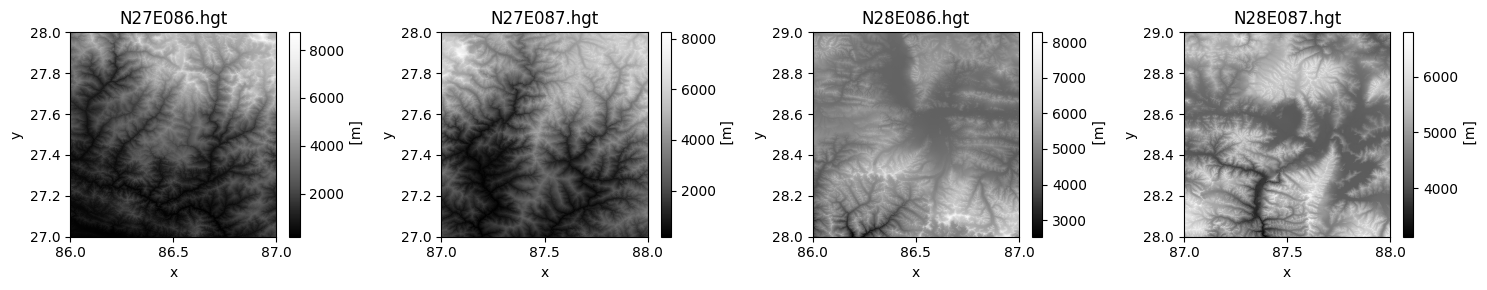

In [15]:
# 创建一个包含1行4列的子图
fig, axes = plt.subplots(1, 4)

# 设置图像尺寸为15英寸宽，3英寸高
fig.set_size_inches(15, 3)

# 遍历子图轴对象和对应的地形数据集
for index, ax in enumerate(axes.flat):
    # 选择第index个数据集
    da = datasets[index]

    # 使用imshow函数在当前轴上绘制地形数据，使用反转的灰度颜色图（Greys_r）
    im = da.plot.imshow(ax=ax, cmap='Greys_r')

    # 使用对应的文件名作为每个子图的标题
    filename = srtm_tiles[index]
    ax.set_title(filename)

# 调整图像布局，使其紧凑
plt.tight_layout()

# 显示绘制的图像
plt.show()


## 合并栅格图像

既然你已经了解了 *xarray* 的基本数据结构和 *rio* 扩展，让我们用它来处理一些数据。我们将获取4个单独的SRTM瓦片，并将它们合并为一个GeoTiff。你会注意到，`rioxarray` 更好地处理了CRS和变换，处理内部细节并提供了一个简单的API。¹²


(1) rioxarray/rioxarray/merge.py at master · corteva/rioxarray - GitHub. https://github.com/corteva/rioxarray/blob/master/rioxarray/merge.py.
(2) corteva/rioxarray: geospatial xarray extension powered by rasterio - GitHub. https://github.com/corteva/rioxarray.

我们将使用 `rioxarray.merge` 模块中的 `merge_arrays()` 方法来合并栅格数据。我们还可以指定一个可选的 `method` 参数来控制如何合并重叠的瓦片。这里我们选择 `first`，它将采用重叠区域中第一个栅格的值。

参考：[`merge_arrays()`](https://corteva.github.io/rioxarray/html/rioxarray.html#rioxarray.merge.merge_arrays)


(1) How to use the rioxarray.merge.merge_arrays function in rioxarray - Snyk. https://snyk.io/advisor/python/rioxarray/functions/rioxarray.merge.merge_arrays.
(2) Rio array merge missing · Issue #759 · corteva/rioxarray - GitHub. https://github.com/corteva/rioxarray/issues/759.
(3) rioxarray/rioxarray/merge.py at master · corteva/rioxarray - GitHub. https://github.com/corteva/rioxarray/blob/master/rioxarray/merge.py.
(4) Limit to number of files that can be merged with `merge_arrays ... - GitHub. https://github.com/corteva/rioxarray/discussions/478.
(5) Add method to merge xarrays geospatially · Issue #46 - GitHub. https://github.com/corteva/rioxarray/issues/46.
(6) rioxarray.merge.merge_arrays - bounds argument · Issue #537 - GitHub. https://github.com/corteva/rioxarray/issues/537.

In [16]:
merged = merge_arrays(datasets, method='first')
merged

<xarray.DataArray (y: 7201, x: 7201)> Size: 104MB
array([[4916, 4926, 4931, ..., 5097, 5098, 5089],
       [4919, 4932, 4928, ..., 5080, 5075, 5069],
       [4919, 4928, 4935, ..., 5063, 5055, 5048],
       ...,
       [ 368,  368,  366, ..., 1905, 1919, 1937],
       [ 364,  364,  362, ..., 1913, 1930, 1944],
       [ 360,  359,  357, ..., 1918, 1930, 1942]], dtype=int16)
Coordinates:
  * x            (x) float64 58kB 86.0 86.0 86.0 86.0 ... 88.0 88.0 88.0 88.0
  * y            (y) float64 58kB 29.0 29.0 29.0 29.0 ... 27.0 27.0 27.0 27.0
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

我们现在可以可视化合并后的栅格。

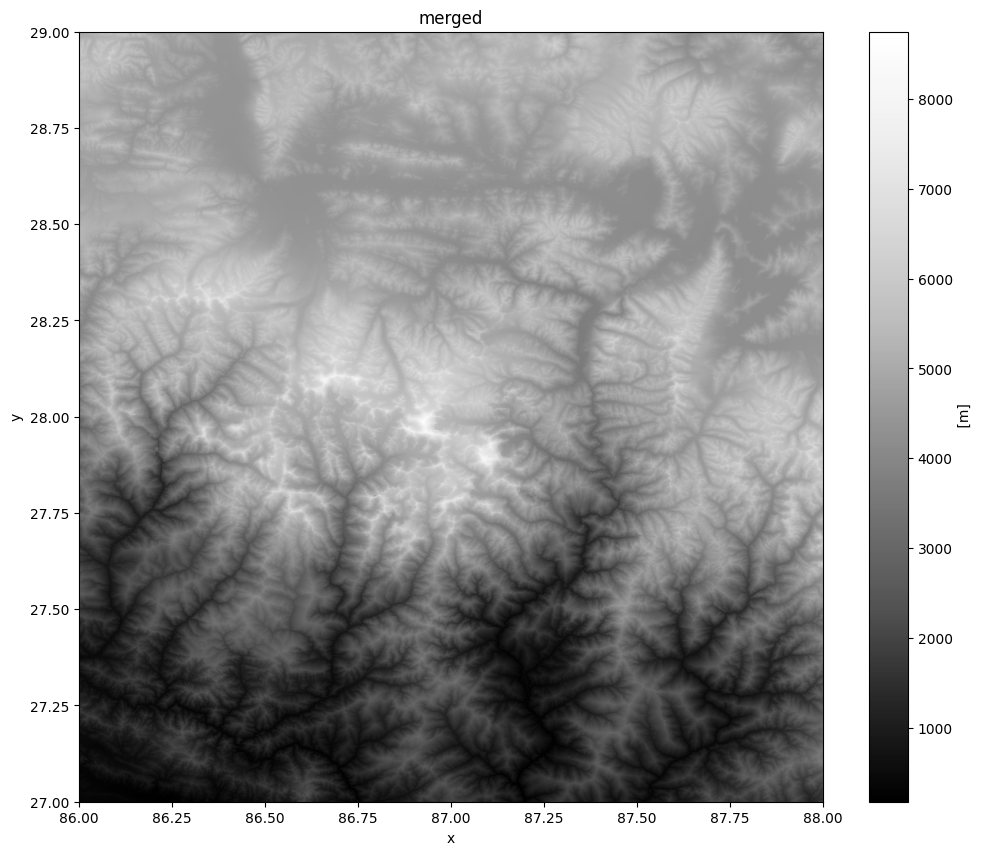

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
merged.plot.imshow(ax=ax, cmap='Greys_r')
ax.set_title('merged')
plt.show()

## 标注输出

有时在你的图表上添加注释以突出某个特征或添加文本标签是很有帮助的。在本节中，我们将学习如何注释数字高程模型（DEM）以显示珠穆朗玛峰的位置和海拔。

首先，我们使用 `max()` 函数在 `merged` DataArray 中定位最大海拔的坐标。然后，我们可以使用 `where()` 函数过滤出值等于最大海拔的元素。最后，我们运行 `squeeze()` 以删除结果中的额外空维度。

参考文献：

* [xarray.DataArray.max](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.max.html)
* [xarray.DataArray.where](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.where.html)

(1) 3D DEM (digital elevation model) in orbital view of Mount Everest.. https://github.com/smaprs/Everest-3D.
(2) Mount Everest - ArcGIS StoryMaps. https://storymaps.arcgis.com/stories/54a5d61f89664b24aecd02b6bf882eaf.
(3) Mapping and Data Visualization with Python (Full Course) - Spatial Thoughts. https://courses.spatialthoughts.com/python-dataviz.html.
(4) undefined. https://smaprs.github.io/Everest-3D/.
(5) undefined. https://github.com/minorua/Qgis2threejs.
(6) undefined. http://glovis.usgs.gov/.
(7) undefined. https://gdex.cr.usgs.gov/gdex/.
(8) undefined. http://www.openstreetmap.org/user/smaprs%29.
(9) Google Colab. https://colab.research.google.com/github/spatialthoughts/python-dataviz-web/blob/main/07_visualizing_rasters.ipynb.
(10) rioxarray/rioxarray/merge.py at master · corteva/rioxarray - GitHub. https://github.com/corteva/rioxarray/blob/master/rioxarray/merge.py.
(11) corteva/rioxarray: geospatial xarray extension powered by rasterio - GitHub. https://github.com/corteva/rioxarray.
(12) xarray.DataArray.max. https://docs.xarray.dev/en/stable/generated/xarray.DataArray.max.html.
(13) xarray.DataArray. https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html.
(14) xarray.DataArray.max — xarray 0.8.0 documentation. https://xarray.pydata.org/en/v0.8.0/generated/xarray.DataArray.max.html.
(15) 如何获取xarray中最大值的坐标？ - python - SO中文参考 .... https://www.soinside.com/question/3Gz2xynKTxAzqHZFXUqebh.
(16) xarray.DataArray.where. https://docs.xarray.dev/en/stable/generated/xarray.DataArray.where.html.
(17) xarray.DataArray.where — xarray 0.15.0 documentation. https://docs.xarray.dev/en/v0.15.1/generated/xarray.DataArray.where.html.
(18) xarray.Dataset.where — xarray 0.8.2 documentation. https://xarray.pydata.org/en/v0.8.2/generated/xarray.Dataset.where.html.

In [18]:
max_da = merged.where(merged==merged.max(), drop=True).squeeze()
max_da

<xarray.DataArray ()> Size: 4B
array(8748., dtype=float32)
Coordinates:
    x            float64 8B 86.93
    y            float64 8B 27.99
    band         int64 8B 1
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Point
    _FillValue:     -32768
    scale_factor:   1.0
    add_offset:     0.0
    units:          m

现在我们提取最大海拔的 x 和 y 坐标以及其对应的值。

In [19]:
max_x = max_da.x.values
max_y = max_da.y.values
max_elev = int(max_da.values)
print(max_x, max_y, max_elev)

86.92555555555556 27.988888888888887 8748


现在我们绘制 `merged` 栅格并使用 `annotate()` 函数进行注释。

参考文献：[matplotlib.pyplot.annotate](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)

(1) matplotlib.pyplot.annotate — Matplotlib 3.9.2 documentation. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html.
(2) 【Kaggle】Matplotlib中的annotate（注解）的用法 - 知乎. https://zhuanlan.zhihu.com/p/482701630.
(3) Matplotlib.pyplot.annotate() in Python - GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-annotate-in-python/.
(4) 3D DEM (digital elevation model) in orbital view of Mount Everest.. https://github.com/smaprs/Everest-3D.
(5) Mount Everest - ArcGIS StoryMaps. https://storymaps.arcgis.com/stories/54a5d61f89664b24aecd02b6bf882eaf.
(6) Mapping and Data Visualization with Python (Full Course) - Spatial Thoughts. https://courses.spatialthoughts.com/python-dataviz.html.
(7) undefined. https://smaprs.github.io/Everest-3D/.
(8) undefined. https://github.com/minorua/Qgis2threejs.
(9) undefined. http://glovis.usgs.gov/.
(10) undefined. https://gdex.cr.usgs.gov/gdex/.
(11) undefined. http://www.openstreetmap.org/user/smaprs%29.

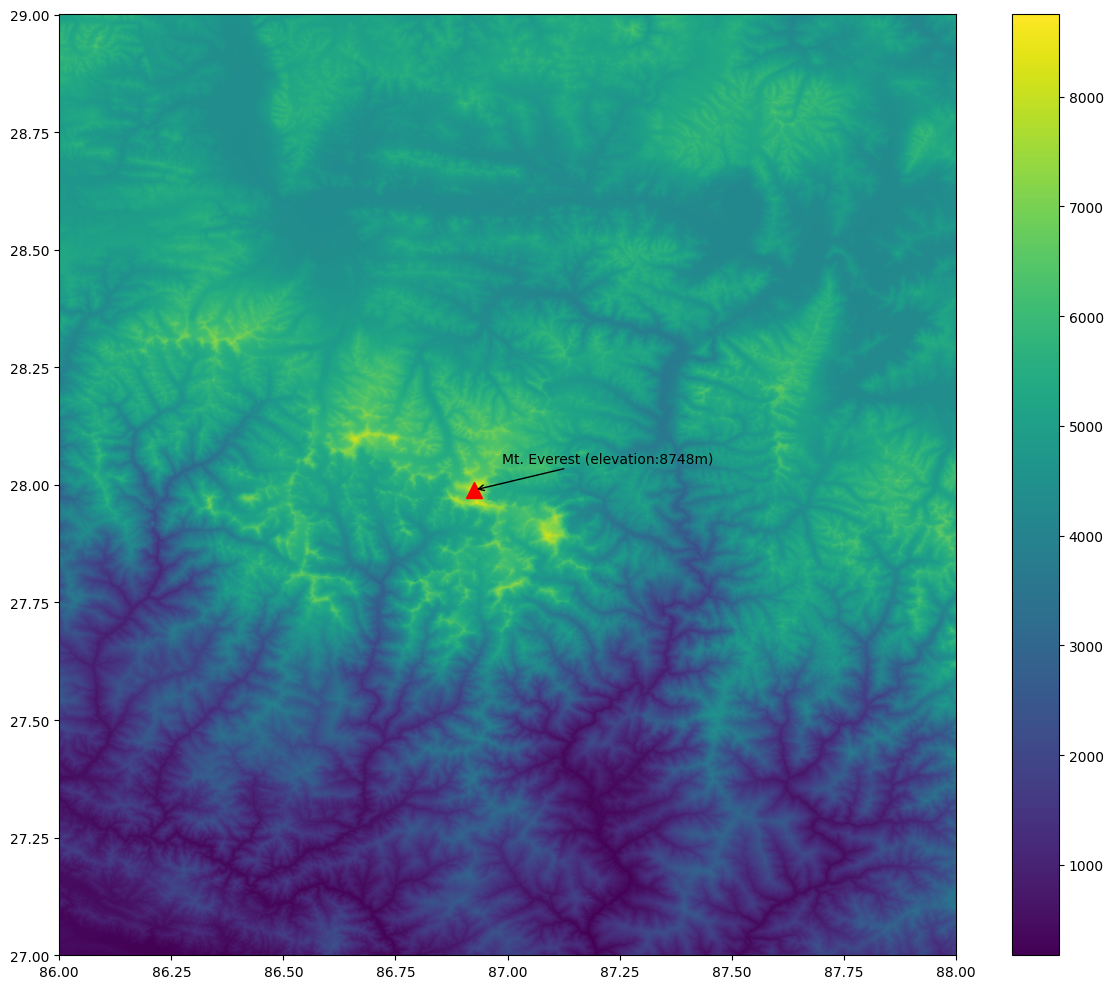

In [ ]:
# 创建一个子图，包含1行1列
fig, ax = plt.subplots(1, 1)

# 设置图像尺寸为12英寸宽，10英寸高
fig.set_size_inches(12, 10)

# 在子图上绘制合并后的数据（使用伪彩色'viridis'颜色图），不添加标签
merged.plot.imshow(ax=ax, cmap='viridis', add_labels=False)

# 在最大x和y坐标处绘制一个红色的三角形标记，表示目标位置（如珠穆朗玛峰）
ax.plot(max_x, max_y, '^r', markersize=11)

# 添加注释，标记珠穆朗玛峰及其海拔高度
ax.annotate('Mt. Everest (elevation:{}m)'.format(max_elev),  # 注释内容为珠穆朗玛峰及其高度
            xy=(max_x, max_y),  # 注释的目标位置
            xycoords='data',  # 以数据坐标指定位置
            xytext=(20, 20),  # 注释文本相对于目标位置的偏移
            textcoords='offset points',  # 偏移的单位为点数
            arrowprops=dict(arrowstyle='->', color='black')  # 设置箭头样式和颜色
            )

# 调整图像布局，使其紧凑
plt.tight_layout()

# 显示绘制的图像
plt.show()


最后，将合并后的数组保存为 GeoTiff 文件到磁盘。

In [ ]:
output_filename = 'merged.tif'
output_path = os.path.join(output_folder, output_filename)
merged.rio.to_raster(output_path)

## 练习

在下面的高程图中添加等高线。你可以使用 [`xarray.plot.contour`](https://docs.xarray.dev/en/stable/generated/xarray.plot.contour.html) 函数来创建等高线图。

提示：使用选项 `colors=black` 和 `levels=10`。


(1) xarray.plot.contour. https://docs.xarray.dev/en/stable/generated/xarray.plot.contour.html.
(2) xarray.plot.contour — xarray 0.14.1 documentation. https://xarray.pydata.org/en/v0.14.1/generated/xarray.plot.contour.html.
(3) Python-气象-大气科学-可视化绘图系列（一）——利用xarray .... https://blog.csdn.net/zhanling_xia/article/details/105487044.
(4) Contour — hvPlot 0.10.0rc2 documentation - HoloViz. https://hvplot.holoviz.org/reference/xarray/contour.html.
(5) Plotting - xarray. https://docs.xarray.dev/en/stable/user-guide/plotting.html.
(6) Contour Demo — Matplotlib 3.9.2 documentation. https://matplotlib.org/stable/gallery/images_contours_and_fields/contour_demo.html.
(7) Visualization Gallery - xarray. https://docs.xarray.dev/en/stable/examples/visualization_gallery.html.
(8) undefined. http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly.

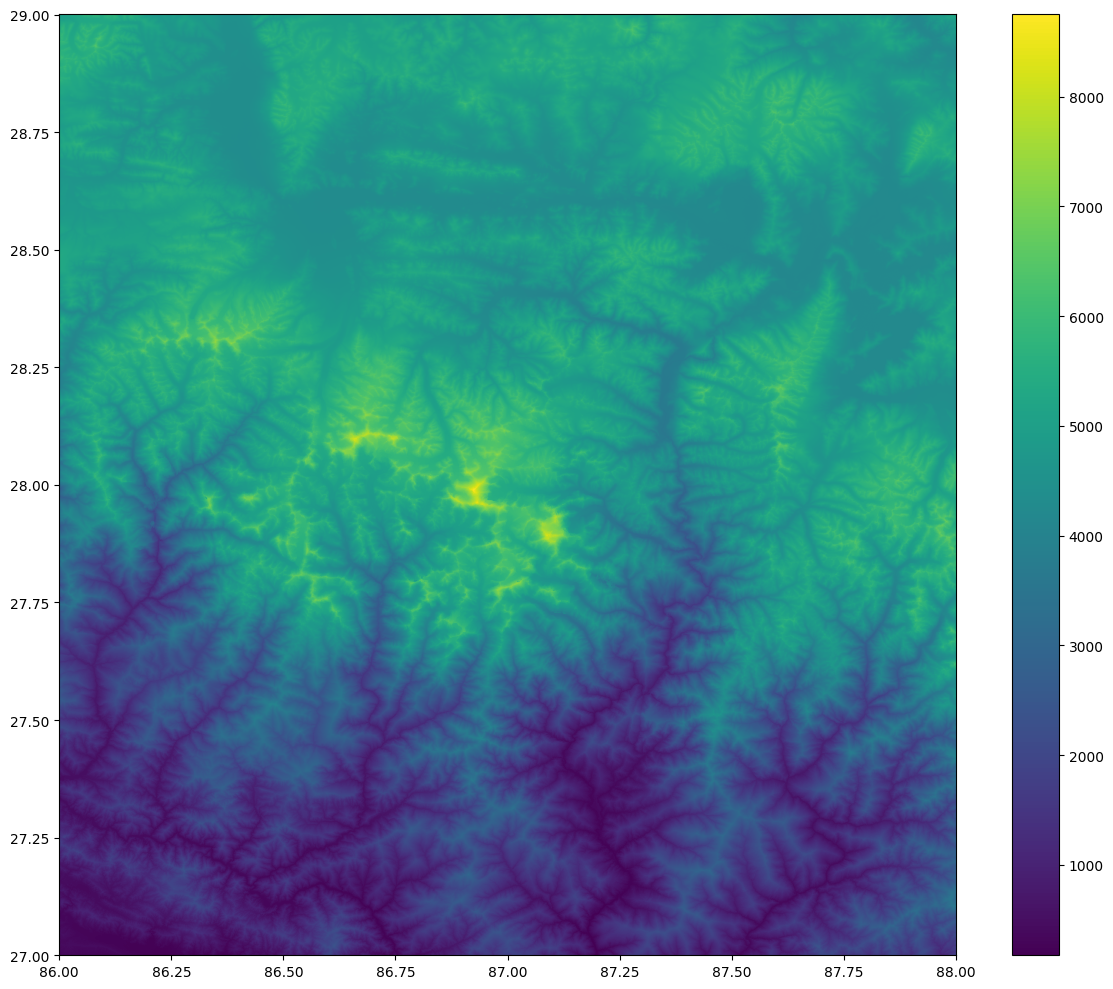

In [ ]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 10)
merged.plot.imshow(ax=ax, cmap='viridis', add_labels=False)
plt.tight_layout()
plt.show()

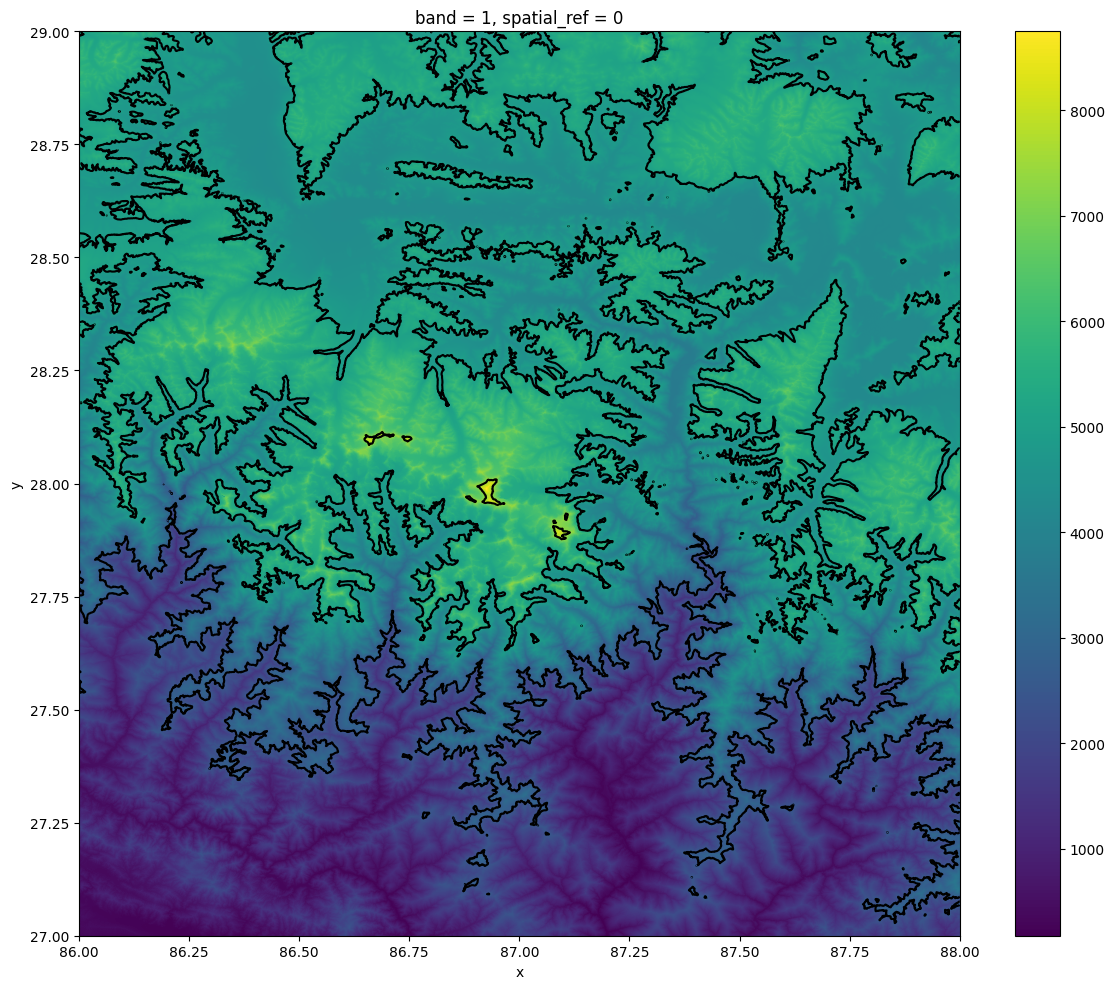

In [ ]:
import matplotlib.pyplot as plt
import xarray as xr

# 假设 merged 是一个 xarray 数据集
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 10)

# 绘制高程图
im = merged.plot.imshow(ax=ax, cmap='viridis', add_labels=False)

# 添加等高线
merged.plot.contour(ax=ax, colors='black', levels=5)

# 调整布局，显示图像
plt.tight_layout()
plt.show()


使用 `xarray.plot.contour` 函数在高程图中添加等高线。假设 `merged` 是一个包含高程数据的 `xarray` 数据集。


### 代码解释：

1. **`fig, ax = plt.subplots(1, 1)`**: 创建一个新的图和轴对象。
2. **`fig.set_size_inches(12, 10)`**: 设置图像的大小。
3. **`merged.plot.imshow(ax=ax, cmap='viridis', add_labels=False)`**: 绘制高程图，使用 `viridis` 颜色映射，不显示轴标签。
4. **`merged.plot.contour(ax=ax, colors='black', levels=10)`**: 使用 `contour` 在图上叠加 10 条等高线，颜色为黑色。
5. **`plt.tight_layout()`**: 自动调整子图布局，避免重叠。
6. **`plt.show()`**: 显示最终图像。

### 参数说明：
- `colors='black'`: 设置等高线的颜色为黑色。
- `levels=10`: 设置等高线的级别数，即分为 10 个等高线层。

这样可以在高程图上添加等高线，帮助识别高程变化。